# Getting Started

In this first step, we're going to try importing data (.nc images) for a given day for all 3 satellite instruments (**ABI**, **OLCI** and **MODIS**) and compare and comment on the results.



## Importing necessary libraries and notebooks

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## Function to load data and create a visualization
Parameters:
- file_path: The destination to the file.
- lat_range, lon_range (optional): a tuple representing the latitude (resp. longitude) range to visualize.
- color (optional): Colormap for the display, viridis by default. 


In [2]:
def visualize(file_path, lat_range = None, lon_range = None, color = "viridis"):
    # Load the netCDF data
    data = xr.open_dataset(file_path)
    
    # If ranges are specified, apply them to select the desired subset
    if lat_range:
        data = data.sel(latitude=slice(*lat_range))
    if lon_range:
        data = data.sel(longitude=slice(*lon_range))

    # Determine the index data and labels based on instrument used
    index_key = 'fai_anomaly' if "abi" in file_path else 'nfai_mean'
    colorbar_label = 'Floating Algae Index Anomaly (FAI)' if "abi" in file_path else 'Normalized Floating Algae Index (NFAI)'
    title = 'FAI anomaly across the selected region on ' if "abi" in file_path else 'NFAI across the selected region on '
    
    # Set up a plot with geographic projections
    fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})
    
    # Extract relevant data (NFAI or FAI anomaly) 
    index_data = data[index_key]

    # Plot the data
    # For the colormap we should choose a color that's good for OF algorithms
    im = index_data.plot(ax=ax, x='longitude', y='latitude', transform=ccrs.PlateCarree(),
                        cmap=color, add_colorbar=True, extend='both', cbar_kwargs={'shrink': 0.35})

    # Add color bar details
    im.colorbar.set_label(colorbar_label)

    # Customize the map with coastlines and features (also optional)
    ax.coastlines(resolution='10m', color='black')
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    #ax.set_extent([lon_min, lon_max, lat_min, lat_max]) #Better not to use this for the moment

    # Adding grid lines
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    
    # Show the plot with title
    plt.title(title + str(data.time.values[0]))
    plt.show()

## MODIS Visualization

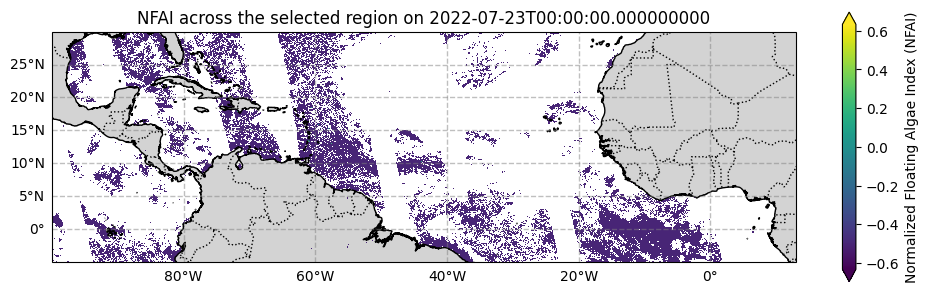

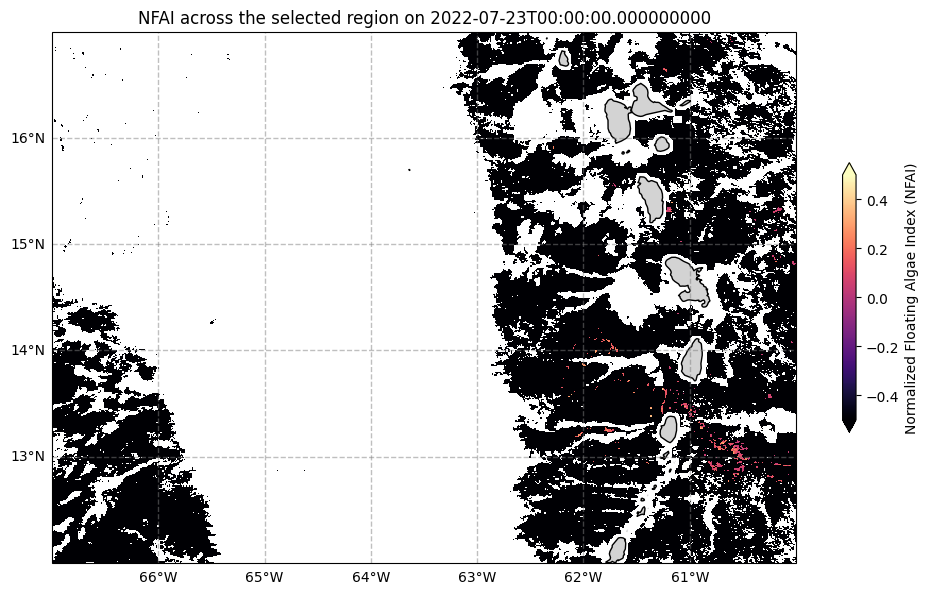

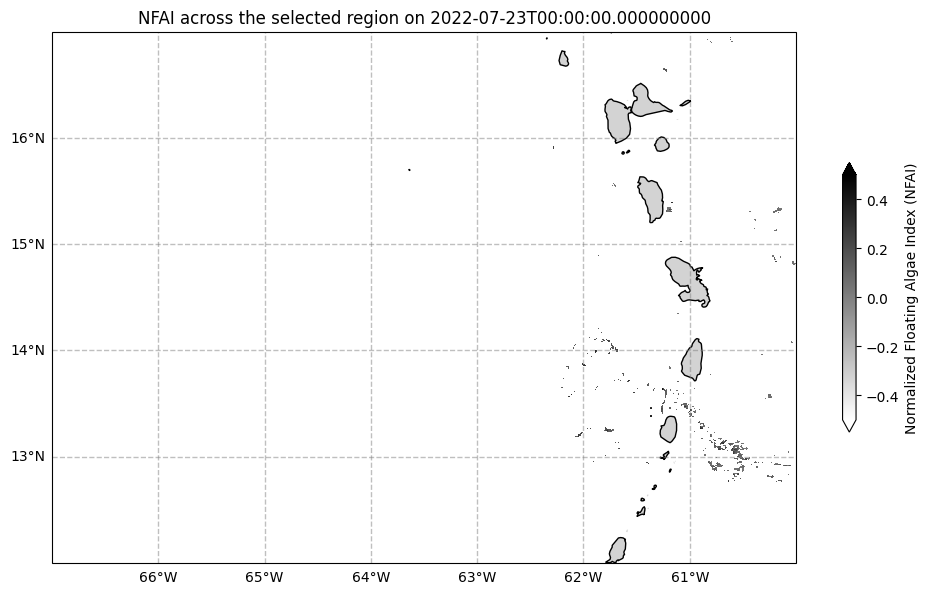

In [6]:
if __name__ == '__main__':
    file_path = "/media/yahia/ballena/CLS/modis-aqua-global-lr/cls-modis-aqua-global-lr_1d_20220723.nc"
    visualize(file_path)
    visualize(file_path,(12,17),(-67,-60),"magma")
    visualize(file_path,(12,17),(-67,-60),"binary")

## OLCI Visualization

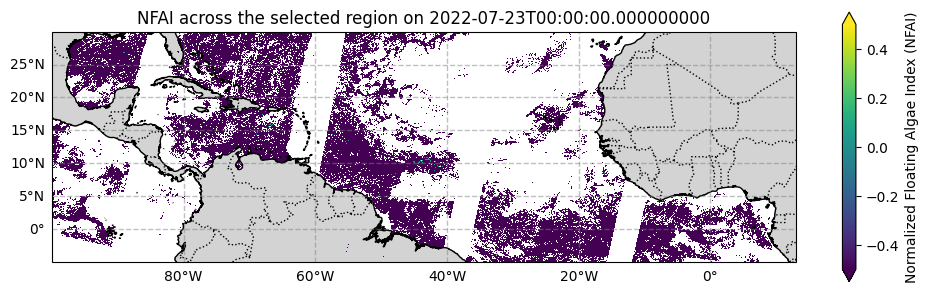

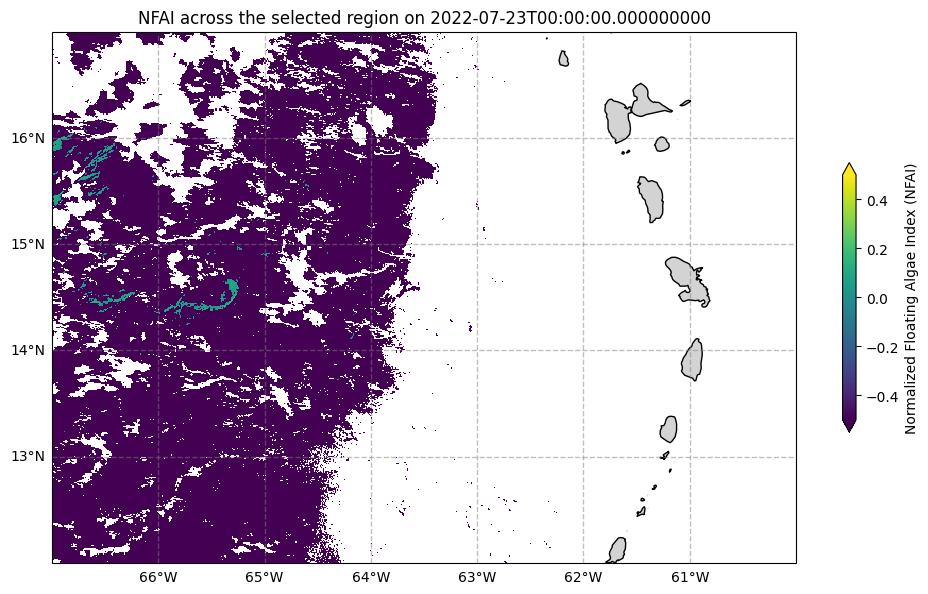

In [7]:
if __name__ == '__main__':
    file_path = "/media/yahia/ballena/CLS/olci-s3-global-lr/cls-olci-s3-global-lr_1d_20220723.nc"
    visualize(file_path)
    visualize(file_path,(12,17),(-67,-60),"viridis")

## ABI Visualization

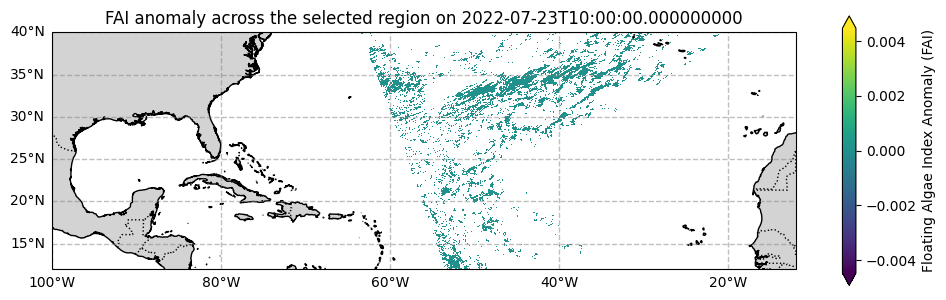

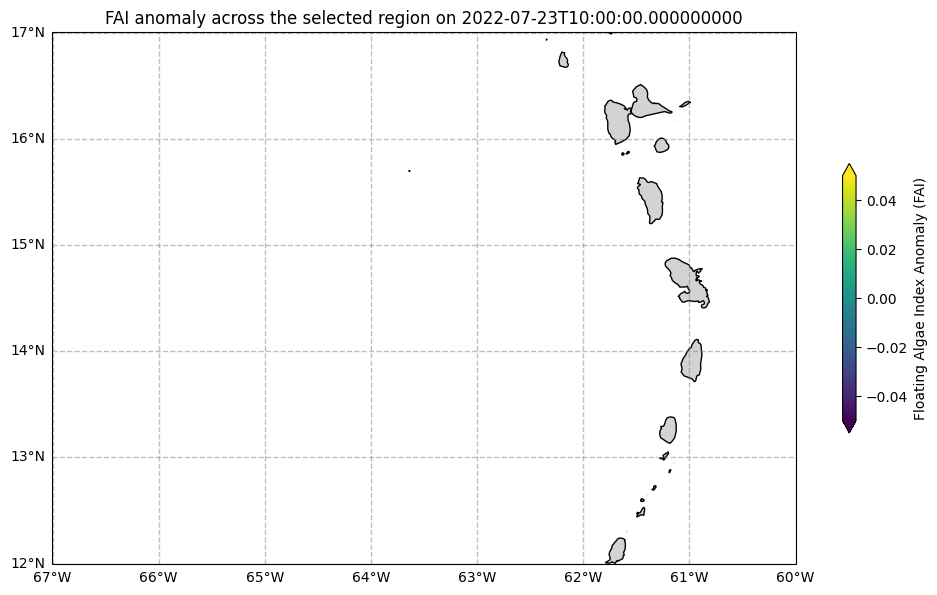

In [8]:
if __name__ == '__main__':
    file_path = "/media/yahia/ballena/CLS/abi-goes-global-hr/cls-abi-goes-global-hr_1d_20220723_10-00.nc"
    visualize(file_path)
    visualize(file_path,(12,17),(-67,-60))

## Visualization Comments
It seems the best instrument at detecting sargassum algae is **OLCI**, followed by **MODIS**, while **ABI** seems to be the worst.

## Color Maps
Here we're going to test different color maps to find out which are the best ones for identifying algae aggregations. We're going to work on **OLCI** images in the **Antilles** on **20/07/2022**.

### Color Map Test Results
#### Uniform Sequential 
These types of color maps show really good contrast between the algae and the rest of the image. The best ones are **viridis**, **inferno** and **magma**. The last two show particularly good contrast.
#### Sequential
While these color maps do single out the algae efficiently, most of them tend to blend the clouds with the rest of the ocean, which may be turn out to be useful later.
#### Sequential 2
These color maps are similar to those from the Uniform Sequential list, but most of them do not show good contrast between the algae and the rest of the image. **Hot**, **afmhot** and **gist_heat** are good exceptions. **Binary** is also interesting but it's more like the color maps from the Sequential list.
#### Diverging
These color maps are great for visualizing the difference between negative and positive values, however some of them make it so the algae are sometimes hard to distinguish from the rest of the image. **Coolwarm** is a good exception though. **Bwr** also allows to distinguish clearly the algae when they are hard to see.
#### Cyclic
While these color maps do highlight the algae, they do not seem adapted to our study either.
#### Qualitative
These would be an interesting choice. While they do cause a loss of precision (especially for the first ones) by making the scale discrete, this may be useful later.
#### Misc
While none of these seem very adapted to our study, some have good contrast: **gnuplot2**, **brg**, **jet** and **nipy_spectral**.

## Case Study 1: ABI-GOES

We're going to study an area in the **Antilles** to the west of Dominica and Martinique because of the high density of sargassum algae there. 
The selected date is **20/07/2022** for the same reasons and the instrument used is **ABI-GOES**.

In [ ]:
if __name__ == '__main__':
    # Visualizing 6 of the ABI-GOES images of the region on 20/07/2022:
    for i in range(6):
        path_file = "/media/yahia/ballena/CLS/abi-goes-global-hr/cls-abi-goes-global-hr_1d_20220720_11-" + str(i) + "0.nc" 
        visualize(path_file,(12,17),(-67,-60))

### Comments
Apparently, ABI-GOES is much more affected by clouds than the other instruments which makes the detection of algae using it really complicated. 
This is going to be harder than working on the images of the other satellites. Using only ABI-GOES for sargassum detection does not seem very feasible.

## Case Study 2: OLCI

We're going to study the same area, but since OLCI's temporal resolution is only 1-day, we can't study the dynamics on on a period of a day, so we'll try doing it for a week, starting from **20/07/2022** until **27/07/2022**.

In [ ]:
if __name__ == '__main__':
    # Visualizing 7 of the OLCI images of the region on the week starting from 20/07/2022:
    for i in range(7):
        path_file = "/media/yahia/ballena/CLS/olci-s3-global-lr/cls-olci-s3-global-lr_1d_2022072" + str(i) + ".nc" 
        visualize(path_file,(12,17),(-67,-60))

### Comments
- While some of the OLCI images are really good (24/07/2022 in particular), a lot of them are ruined by clouds (25/07/2022) or are date for which the data simply isn't available in the region because of the limited coverage of the satellite on that given date.
- The lower temporal resolution also poses a significant challenge in tracking aggregations; as we can see, if the detections are accurate, the aggregations detected next to the islands on 20/07/2022 drifted significantly and are undetectable the next day.

## Case Study 3: MODIS

Always in the same area, this time we're going to study the MODIS images on the same 1-week interval which should produce something similar to OLCI with less accuracy.

In [ ]:
if __name__ == '__main__':
    # Visualizing 7 of the OLCI images of the region on the week starting from 20/07/2022:
    for i in range(7):
        path_file = "/media/yahia/ballena/CLS/modis-aqua-global-lr/cls-modis-aqua-global-lr_1d_2022072" + str(i) + ".nc" 
        visualize(path_file,(12,17),(-67,-60))

### Comments
- As expected, the images are similar to OLCI's but less accurate, with more cloud interference and less algae aggregations detected.
- We should try to find dates for which the images are more clear to test out velocity estimation algorithms, but if this is the best we can find, maybe we should look for a way to use these 3 instruments synergistically.
- One idea would be to **sync** the images from the satellites to the same time, then superpose them after only leaving the algae (by either using an adapted colormap or using an index threshold) so that way we can have more dense aggregations to track using the algorithms we will write.
- Syncing these images however is not an easy thing to do. I don't yet know when the images from OLCI and MODIS are taken **(I should look this up)**. An idea for syncing the images would be to fix a wisely chosen time (that's ideally already synced for two of the satellites) and use drift models to try to estimate the position of the algae at that time. 

In [ ]:
if __name__ == '__main__':
    # Visualizing 6 of the ABI-GOES images of the region on 24/07/2022:
    for i in range(6):
        path_file = "/media/yahia/ballena/CLS/abi-goes-global-hr/cls-abi-goes-global-hr_1d_20220724_12-" + str(i) + "0.nc" 
        visualize(path_file,(12,17),(-67,-60))